In [71]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

input_image_path = cv2.imread("Ayan.jpeg")

#grayscale the image
grayScale = cv2.cvtColor(input_image_path, cv2.COLOR_BGR2GRAY)

cv2.imshow('Graysacle', grayScale)
cv2.waitKey(0)
cv2.destroyAllWindows()

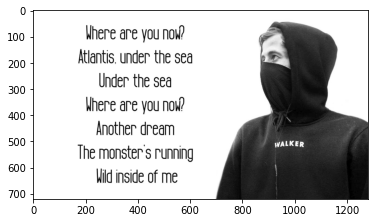

In [44]:
#Noise removal function
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

no_noise = noise_removal(grayScale)
# cv2.imwrite("preprocess/no_noise.jpg", no_noise)

plt.imshow(grayScale,'gray',vmin=0,vmax=255)
cv2.imshow('noiseReduction', no_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
# Apply thresholding to get a binary image
_, binary_image = cv2.threshold(grayScale, 128, 255, cv2.THRESH_BINARY)
B1 = cv2.adaptiveThreshold(grayScale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5, C = 15)

# Apply morphological operations to remove noise and enhance text regions
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
processed_image = cv2.morphologyEx(kernel, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Thresh Image", binary_image)
cv2.imshow("Adaptive Thresh", B1)
cv2.imshow("Processed image", processed_image)
# cv2.imshow("Adaptive Thresh", B1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [6]:
#Thicking the image //So far we don't using thicking
def Thicken(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
    
eroded_image = Thicken(B)

cv2.imshow('Thicking', eroded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [22]:
#Histogram
dst = cv2.equalizeHist(B)
cv2.imshow("Orig", scaled_image)
cv2.imshow("Equal Hist", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(-1)

-1

In [ ]:
# draw bounding boxes around letters

import cv2
from matplotlib import pyplot as plt
import pytesseract
    
def draw_boxes_on_character(img):
    # Load the image using OpenCV
#     img= cv2.resize(img,(500,800))
    img_height, img_width, _ = img.shape  # Get image dimensions
    
    #grayscale the image
    grayScale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to get a binary image
    _, binary_image = cv2.threshold(grayScale, 128, 255, cv2.THRESH_BINARY)
    B1 = cv2.adaptiveThreshold(grayScale, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 5, C = 15)

    data = pytesseract.image_to_string(B1)
    print(data)
    
    # Use Tesseract to get character-level bounding box information
    boxes = pytesseract.image_to_boxes(B1)

    for box in boxes.splitlines():
        box = box.split(" ")
        character = box[0]
        
        x = int(box[1])
        y = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])

        # Draw a bounding box around the character
        cv2.rectangle(B1, (x, img_height - y), (x2, img_height - y2), (0, 255, 0), 1)

        # Add the character as a label
        cv2.putText(B1, character, (x, img_height - y2), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)

    
    return B1
    
# Specify the path to the image you want to process
input_image_path = cv2.imread("lines.jpg")

# Call the function to draw boxes on detected characters
result_image = draw_boxes_on_character(input_image_path)

# Display or save the resulting image
cv2.imshow('Detected Characters', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)


6 it akemiielly tails content, mith only cast
iinet

Laas




In [35]:
# Faded = pytesseract.image_to_string(dst)
# print(Faded)

Thresh = pytesseract.image_to_string(B)
print(Thresh)

Where are you now
Atlas, under ihe sea
Under the sea
Hhere are you now
another dream
The rnonster's rung
\d mside of me




In [ ]:
# cv2.imshow('Graysacle', grayScale)
# cv2.imshow('noiseReduction', no_noise)
# cv2.imshow("threshold", B1)
# cv2.imshow("Adpative thresholding", B)
# cv2.imshow('Eroded_image', eroded_image)
# cv2.imshow("Equal Hist", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(-1)

In [17]:
# # Applying an opening morphological operation (i.e., dilation followed by erosion) 
# # disconnects connected blobs and removes noise
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
# opening = cv2.morphologyEx(B, cv2.MORPH_OPEN, kernel)
# cv2.imshow("Opening", opening)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(-1)

-1

In [18]:
#contours
contours, hierarchy = cv2.findContours(B,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# drawing contours over blank image
ctr = np.zeros(input_image_path.shape, dtype=np.uint8);
cv2.drawContours(ctr, contours, -1, (0,255,0), 1)
# drawing contours over original image
img_with_contours = input_image_path.copy();
cv2.drawContours(img_with_contours, contours, -1, (0,255,0), 1) # Talk about (0, 255, 0) colors
cv2.imshow("Original countours", img_with_contours[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(-1)

-1

In [19]:
# does not work

import cv2
import pytesseract

def print_detected_characters(img):
    # Load the image using OpenCV
    # img = cv2.resize(img, (500, 800))

    # Use Tesseract to get character-level information
    characters = pytesseract.image_to_string(img)

    # Print the detected characters
    print(characters)

# Specify the path to the image you want to process

# Call the function to print the detected characters
print_detected_characters(dst)


Where are you now
Atlas, under ihe sea
Under the sea
Hhere are you now
another dream
The rnonster's rung
\d mside of me


